In [2]:
import uproot
import tensorflow as tf
import zfit
import awkward as ak
import matplotlib.pyplot as plt
#import pyroot
import numpy as np


In [4]:
#import crySpec root file and convert to numpy array
file = uproot.open("mu2e_caloSimu_crySpec867.root")
TH1F_name = ["h_spec", "h_ratio", "h_ntrg", "h_stim", "h_time", "h_tErg"]
#what is h_spec stand for?
h_spec = file["h_spec"].to_numpy()

AttributeError: 'TH1F' object has no attribute 'to_numpy'

In [5]:
#parameters for crystal ball function: mu(mean--peak), sigma(widths), alpha, n(exp of powetail), observable range
cryspec = zfit.Space(['x'], limits=(3,7)) #obs range
ergElec = zfit.Parameter("electron energy", 0.511)
fcbalpha = zfit.Parameter("fcbalpha", 2.5, 0.05, 20.0);
fcbndeg = zfit.Parameter ("fcbndeg", 10, 0.25, 80.);
#params for full hist
fullPeak = zfit.Parameter( "full peak", 6.05, 5.0, 6.75);
fullWidth = zfit.Parameter( "width of the full peak", 0.35, 0.15, 0.70);
#params for fst peak
fstEsPeak = fullPeak - ergElec
fstWidth = zfit.Parameter("width of first escape peak", 0.35, 0.15, 0.70);
#params for scnd peak
scdWidth = zfit.Parameter("width of second escape peak", 0.35, 0.15, 0.70);
scdEsPeak = fullPeak - 2*ergElec
#Note:seems like zfit has an overloading problem with parameter naming

In [6]:
#crystal ball function for all 3 peaks
fullErg = zfit.pdf.CrystalBall(obs=cryspec, mu=fullPeak, sigma=fullWidth, alpha=fcbalpha, n=fcbndeg)
firstErg = zfit.pdf.CrystalBall(obs=cryspec,mu=fstEsPeak,sigma=fstWidth,alpha=fcbalpha, n=fcbndeg)
secdErg = zfit.pdf.CrystalBall(obs=cryspec, mu=scdEsPeak, sigma=scdWidth, alpha=fcbalpha, n=fcbndeg)

In [7]:
#set limits for observable range
lower, upper = cryspec.limits
#set x axis as a range of given limits
x_plot = np.linspace(lower[-1][0], upper[0][-1], num=60)
#use crystal ball function to set y axis and normalise 
y_plot_full = zfit.run(fullErg.pdf(x_plot,norm_range=cryspec))*x_plot.shape[0]/cryspec.area()
y_plot_first = zfit.run(firstErg.pdf(x_plot,norm_range=cryspec))*x_plot.shape[0]/cryspec.area()
y_plot_secd = zfit.run(secdErg.pdf(x_plot,norm_range=cryspec))*x_plot.shape[0]/cryspec.area()

In [8]:
bin_centers = 0.5 * (h_spec[1][1:] + h_spec[1][:-1])
bin_width = h_spec[1][1] - h_spec[1][0]

fig_spec, ax_spec = plt.subplots(figsize=(6,6))
ax_spec.bar(bin_centers, h_spec[0], width = bin_width)
plt.plot(x_plot, y_plot_full, color="yellow", label='Full Peak')
plt.plot(x_plot, y_plot_first, color="red",label='1st Esc Peak')
plt.plot(x_plot, y_plot_secd, color="cyan",label='2nd Esc Peak')
plt.ylabel('-',fontsize=17)
plt.xlabel('E_reco [MeV]',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
leg = plt.legend(fontsize=12);
plt.title("Energy Spectrum for Crystal 867");
plt.show


NameError: name 'h_spec' is not defined

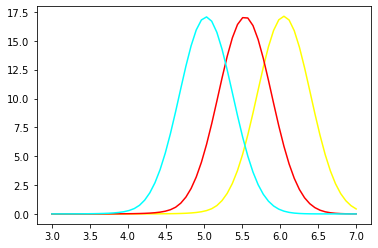

In [169]:
plt.plot(x_plot, y_plot_full, color="yellow", label='Full Peak')
plt.plot(x_plot, y_plot_first, color="red",label='1st Esc Peak')
plt.plot(x_plot, y_plot_secd, color="cyan",label='2nd Esc Peak')

In [ ]:
m_e = 9.109*10^[-31]
E_full = 6.13
escpeak_1 = E_full - m_e
escpeak_2 = E_full - 2*m_e

In [154]:
#obs = zfit.Space(['x'], limits=(3,7))
lower, upper = cryspec.limits
x_plot_full = np.linspace(lower[-1][0], upper[0][-1], num=1000)
y_plot_full = zfit.run(fullErg.pdf(x_plot_full,norm_range=cryspec))*60
x_plot_first = np.linspace(lower[-1][0:], upper[0][-1], num=1000)
y_plot_first = zfit.run(firstErg.pdf(x_plot_first,norm_range=cryspec))*60
#plt.plot(x_plot_full, y_plot_full)
#plt.plot(x_plot_first, y_plot_first)
#print(lower[0][0])
#print(lower[-1][0])
#print(upper[0][0])
#print(upper[-1][0])
#print(x_plot_full)
#print(y_plot_full)
print(len(h_spec[:1]))
print(cryspec.area())
print(x_plot.shape[0])

1
tf.Tensor([4.], shape=(1,), dtype=float64)
60
